### 목표
- 선형회귀 모델 클래스를 이용해보자
- MSE (Mean Squared Error) 평균제곱오차를 이해해보자.
- 경사하강법을 이해해보자
- 회귀모델의 평가지표를 이해해보자.

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
score_data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                          columns=['공부시간','성적'] )
score_data

,공부시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


In [123]:
X = score_data[['공부시간']]
y = score_data['성적']

#### 1.수학 공식을 이용한 해석적 방법 (OLS)

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
# 모델생성
linear_model = LinearRegression()

In [126]:
# 모델 학습
linear_model.fit(X,y)

LinearRegression()

In [127]:
# 모델 예측
linear_model.predict([[7]])

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

In [128]:
# 가중치 확인
print('가중치', linear_model.coef_)
print('절편', linear_model.intercept_)


# 가중치 [10.]
# 절편 7.105427357601002e-15
# e-15 -> 7.10 -> 왼편으로 15번
# e+15 -> 7.10 -> 오른편으로 15번

가중치 [10.]
절편 7.105427357601002e-15


#### 2. 경사 하강법을 이용하는 모델

In [129]:
from sklearn.linear_model import SGDRegressor

In [130]:
# max_iter=> 최대 몇번 반복 할 건지 (기본 1000)
# eta0= >학습률(0.01)

model = SGDRegressor(max_iter=1000,   # 경사하강법을 적용하는 최대반복횟수
                     eta0=0.01)      # 학습률
model.fit(X,y)

SGDRegressor()

In [131]:
model.predict([[7]])

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([70.04500182])

In [132]:
# 가중치 확인
print('가중치', model.coef_)
print('절편', model.intercept_)

가중치 [9.84357877]
절편 [1.13995043]


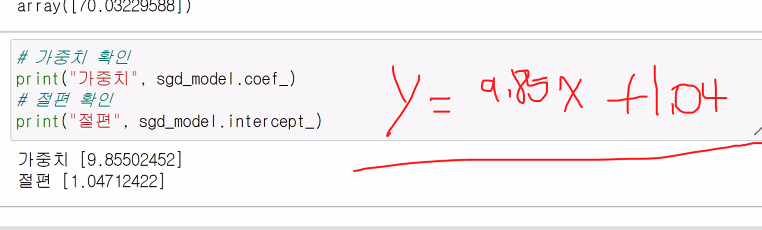

#### 2.2 가중치(w) 변화에 따른 MSE변화 그래프 확인

In [133]:
# 선형모델 기본함수 (편의상 절편은 0으로...)
def h(x,w):
    return x * w + 0

In [134]:
# MSE함수
def MSE(x,y,w):
    # 실제값과 예측값의 차이 -> 오차
    pre_y = h(x,w)     # 예측값
    error = y - pre_y  # 오차 = 실제값 - 예측값
    # 오차를 제곱해서 평균
    mse = (error ** 2).mean()
    return mse

In [135]:
MSE(score_data['공부시간'],score_data['성적'],10)

0.0

In [136]:
w_list = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [137]:
mse_list = [MSE(score_data['공부시간'],score_data['성적'],w) for w in w_list]

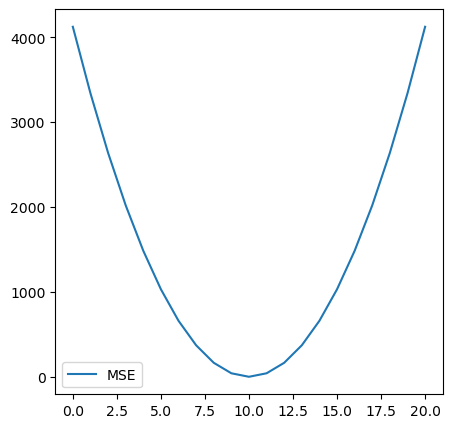

In [138]:
plt.figure(figsize=(5,5))
plt.plot(w_list, mse_list, label='MSE')
plt.legend()
plt.show()

In [139]:
# 교자검증
from sklearn.model_selection import cross_val_score
# 분리
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### 3. 호주 집 가격 데이터 셋 예측
- 데이터 로드
- 입력특성 5개 선택
    - 수치데이터면서 결측치가 없는 것만 5개
    - 결측치 처리, 인코딩처리를 포함해서 5개
- LinearRegression, SGDRegressor 모델 학습 및 평가
    - 문제, 답 분리
    - 훈련용, 평가용 분리
    - 모델 생성 및 학습
    - score 함수 이용해서 평가 점수 확인

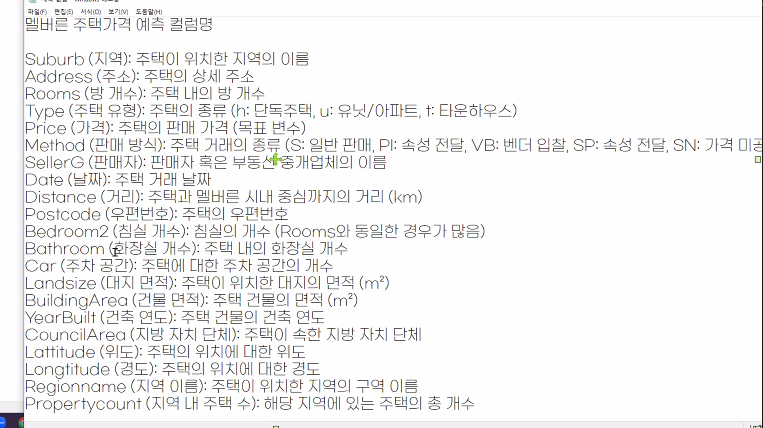

In [140]:
data = pd.read_csv("./data/melb_data.csv")

In [141]:
# Rooms, Bedroom2, Bathroom, YearBuilt, Car
len(data.columns) # 21
data.columns  # (['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
                    # 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
                    # 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
                    # 'Longtitude', 'Regionname', 'Propertycount']
data.corr()['Price'].sort_values()

YearBuilt       -0.323617
Lattitude       -0.212934
Distance        -0.162522
Propertycount   -0.042153
Landsize         0.037507
BuildingArea     0.090981
Postcode         0.107867
Longtitude       0.203656
Car              0.238979
Bathroom         0.467038
Bedroom2         0.475951
Rooms            0.496634
Price            1.000000
Name: Price, dtype: float64

In [142]:
#  0   Suburb         13580 non-null  object 
#  1   Address        13580 non-null  object 
#  3   Type           13580 non-null  object 
#  5   Method         13580 non-null  object
#  6   SellerG        13580 non-null  object 
#  7   Date           13580 non-null  object 
#  16  CouncilArea    12211 non-null  object 
#  19  Regionname     13580 non-null  object 
 
  
#  2   Rooms          13580 non-null  int64  
#  4   Price          13580 non-null  float64
#  8   Distance       13580 non-null  float64
#  9   Postcode       13580 non-null  float64
#  10  Bedroom2       13580 non-null  float64
#  11  Bathroom       13580 non-null  float64
#  12  Car            13518 non-null  float64
#  13  Landsize       13580 non-null  float64
#  14  BuildingArea   7130 non-null   float64
#  15  YearBuilt      8205 non-null   float64
#  17  Lattitude      13580 non-null  float64
#  18  Longtitude     13580 non-null  float64
#  20  Propertycount  13580 non-null  float64

# ==========================
# ==========================결측치

# 12  Car
# 14  BuildingArea
# 15  YearBuilt
# 16  CouncilArea

In [143]:
data.info()
# Rooms, Bedroom2, Bathroom, YearBuilt, Car      Lattitude
# Rooms, Bedroom2, Bathroom, Car, Lattitude
# YearBuilt      8205 non-null   float64
# Car            13518 non-null  float64
#  13580


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

<AxesSubplot:xlabel='Car'>

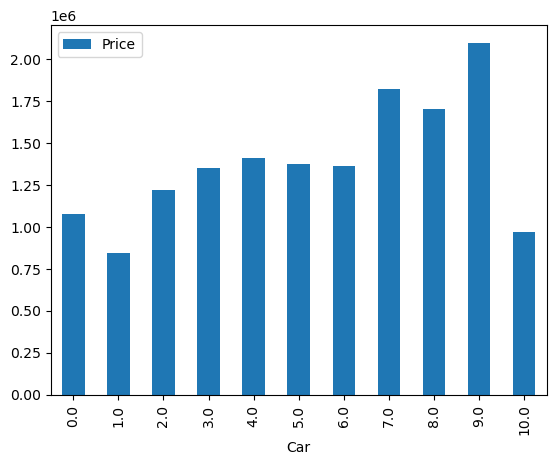

In [144]:
data['Car']
data[['Car','Price']].groupby(['Car']).mean().plot(kind='bar')

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [146]:
X = pd.get_dummies(data)
y = data['Price']

In [147]:
data['Car'].unique()
data['Car'][data['Car'].isna()]=data['Car'].mean()
data['Car'] = data['Car'].astype('int64')
data['Car']

C:\Users\SMHRD\AppData\Local\Temp\ipykernel_19468\1553351052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Car'][data['Car'].isna()]=data['Car'].mean()


0        1
1        0
2        0
3        1
4        2
        ..
13575    2
13576    2
13577    4
13578    5
13579    1
Name: Car, Length: 13580, dtype: int64

In [148]:
X = data[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Lattitude']]
y = data['Price']

In [82]:
# X.info()

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6)

In [150]:
print("훈련용 문제 X: ", X_train.shape, "훈련용 답 y: ",  y_train.shape)
print("테스트용 문제 X: ", X_test.shape, "테스트용 답 y: ", y_test.shape)

훈련용 문제 X:  (9506, 5) 훈련용 답 y:  (9506,)
테스트용 문제 X:  (4074, 5) 테스트용 답 y:  (4074,)


In [151]:
# 모델 생성
house_model_linear = LinearRegression()
house_model_sgd = SGDRegressor()

In [152]:
house_model_linear.fit(X_train,y_train)
house_model_sgd.fit(X_train,y_train)

SGDRegressor()

In [153]:
print("Linear Score:",house_model_linear.score(X_test, y_test))
print("SGC Score:",house_model_sgd.score(X_test, y_test))

Linear Score: 0.3288319539524799
SGC Score: -0.0561153842073292


In [154]:
linear_pre_test = house_model_linear.predict(X_test)
print("mse:",mean_squared_error(y_test,linear_pre_test))
print("rmse:",mean_squared_error(y_test,linear_pre_test)**0.5)
# 534757 달러만큼의 오차가 있다.

mse: 271120663046.57602
rmse: 520692.4841464259


In [155]:
sgc_pre_test = house_model_sgd.predict(X_test)
print("mse:",mean_squared_error(y_test,sgc_pre_test))
print("rmse:",mean_squared_error(y_test,sgc_pre_test)**0.5)
# 627675.9355240004 달러만큼의 오차가 있다.

mse: 426621477148.9693
rmse: 653162.672807448


In [156]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

In [157]:
s_scaler.fit(X_train)

StandardScaler()

In [158]:
# 훈련용 데이터와 테스트 데이터에 스케일링 적용해보자
t_X_train = s_scaler.transform(X_train)
t_X_test = s_scaler.transform(X_test)

In [159]:
house_model_linear = LinearRegression()
house_model_sgd = SGDRegressor(eta0=0.005)

In [160]:
house_model_linear.fit(t_X_train,y_train)
house_model_sgd.fit(t_X_train,y_train)

SGDRegressor(eta0=0.005)

In [161]:
print("Linear Score:",house_model_linear.score(t_X_test, y_test))
print("SGC Score:",house_model_sgd.score(t_X_test, y_test))

Linear Score: 0.32883195395247966
SGC Score: 0.32846995052796324
